In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# from rdkit import Chem
import os

from torch_geometric.loader import DataLoader
import torch
from utils_data import TestbedDataset

/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = 'root_folder/root_020/Saliency/GNNExplainer/'

# GNN Explainer
There are two outputs from gnn explainer:
1. node feature mask
2. edge mask

## Edge mask
For each pair of drug_cellLine, there is a saliency vector of size (num_edge, )

In [3]:
method = 'GAT_Edge'
drug_dir = path + 'Bonds/' + method

In [4]:
branch_folder = "root_folder/root_017"
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')
test_batch = 1
test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)

Pre-processed data found: root_folder/root_017/processed/GDSC_test_mix.pt, loading ...


In [5]:
len(test_data)

19105

In [10]:
file_list = os.listdir(drug_dir)
file_list[:50]

['0_Amuvatinib_907065.npy',
 '10000_Camptothecin_1299061.npy',
 '10001_Obatoclax Mesylate_925346.npy',
 '10002_AKT inhibitor VIII_909762.npy',
 '10003_YK-4-279_946354.npy',
 '10004_Navitoclax_909249.npy',
 '10005_Phenformin_906798.npy',
 '10006_JW-7-24-1_910401.npy',
 '10007_Piperlongumine_687590.npy',
 '10008_Embelin_907063.npy',
 '10009_Avagacestat_1503365.npy',
 '1000_Quizartinib_687819.npy',
 '10010_Bleomycin_753614.npy',
 '10011_Vismodegib_1298222.npy',
 '10012_Idelalisib_907787.npy',
 '10013_JQ1_905959.npy',
 '10014_AS605240_905959.npy',
 '10015_TGX221_905967.npy',
 '10016_Axitinib_907791.npy',
 '10017_SGC0946_906791.npy',
 '10018_Tanespimycin_910942.npy',
 '10019_Shikonin_924106.npy',
 '1001_UNC0638_1240198.npy',
 '10020_Tamoxifen_908136.npy',
 '10021_NVP-BHG712_908149.npy',
 '10022_EHT-1864_724879.npy',
 '10023_Tamoxifen_971774.npy',
 '10024_Enzastaurin_906804.npy',
 '10025_BI-2536_1303896.npy',
 '10026_VX-11e_908128.npy',
 '10027_Cytarabine_949155.npy',
 '10028_CCT-018159_7535

### One sample

In [29]:
one_ss = np.load(os.path.join(drug_dir, '0_Amuvatinib_907065.npy'))
one_ss.shape

(74,)

In [30]:
one_ss

array([0.5019026 , 0.47823852, 0.49837002, 0.48927367, 0.31849116,
       0.46027473, 0.49314904, 0.5249071 , 0.48280674, 0.41921628,
       0.5306403 , 0.41468808, 0.5051504 , 0.4900766 , 0.51639044,
       0.54081815, 0.46622172, 0.459222  , 0.58219147, 0.5152768 ,
       0.5324115 , 0.47674388, 0.52491313, 0.5341433 , 0.3692854 ,
       0.55958694, 0.58314276, 0.5376288 , 0.3985968 , 0.32171997,
       0.5484067 , 0.47304878, 0.5568172 , 0.56654465, 0.5077417 ,
       0.49227783, 0.45005608, 0.46651316, 0.4684859 , 0.59963405,
       0.52652997, 0.40674946, 0.62541   , 0.46781313, 0.5525559 ,
       0.5572757 , 0.54009557, 0.5809959 , 0.613338  , 0.46298993,
       0.4085846 , 0.46456265, 0.55556387, 0.49780834, 0.61825824,
       0.51607776, 0.46662524, 0.5754309 , 0.39849705, 0.4808595 ,
       0.419197  , 0.41763753, 0.5694907 , 0.55678713, 0.515651  ,
       0.5367727 , 0.60746914, 0.43065482, 0.37042013, 0.42389622,
       0.44812375, 0.6389505 , 0.5217596 , 0.47190356], dtype=

In [31]:
norm_one_ss = (one_ss - one_ss.min()) / (one_ss.max() - one_ss.min())
norm_one_ss

array([0.57233906, 0.4984949 , 0.56131566, 0.5329303 , 0.        ,
       0.4424385 , 0.5450235 , 0.6441252 , 0.51275015, 0.31431478,
       0.66201574, 0.30018446, 0.5824739 , 0.53543586, 0.61754876,
       0.69377595, 0.46099624, 0.43915343, 0.8228822 , 0.6140736 ,
       0.6675428 , 0.49383083, 0.644144  , 0.672947  , 0.15850447,
       0.7523443 , 0.8258507 , 0.6838236 , 0.24997127, 0.01007558,
       0.7174562 , 0.4823002 , 0.7437012 , 0.774056  , 0.59056014,
       0.5423049 , 0.410551  , 0.46190566, 0.46806163, 0.8773121 ,
       0.64918935, 0.2754118 , 0.95774657, 0.46596226, 0.73040384,
       0.7451321 , 0.6915211 , 0.81915146, 0.9200756 , 0.45091134,
       0.2811384 , 0.45581907, 0.7397902 , 0.5595629 , 0.9354293 ,
       0.61657304, 0.46225542, 0.8017858 , 0.24966   , 0.5066737 ,
       0.3142546 , 0.30938825, 0.7832491 , 0.74360746, 0.6152413 ,
       0.6811521 , 0.9017617 , 0.350009  , 0.1620454 , 0.32891867,
       0.40452117, 1.        , 0.6343034 , 0.47872654], dtype=

### Aggregate the saliency scores from all pairs of drug & cell line
1. drug_dict: count how many times each drug appear in the test dataset
2. drug_sal_dict:  accumulate all saliency scores for each drug, then average them by the appearing times
3. edge_index_dict & smiles_dict: record edge index and smiles of drugs

In [5]:
drug_dict = dict()
for filename in os.listdir(drug_dir):
    drug_name = filename.split('_')[1]
    if drug_name not in drug_dict.keys():
        drug_dict[drug_name] = 1
    else:
        drug_dict[drug_name] += 1

drug_dict

{'Amuvatinib': 93,
 'Camptothecin': 83,
 'Obatoclax Mesylate': 93,
 'AKT inhibitor VIII': 188,
 'YK-4-279': 82,
 'Navitoclax': 93,
 'Phenformin': 106,
 'JW-7-24-1': 77,
 'Piperlongumine': 90,
 'Embelin': 92,
 'Avagacestat': 191,
 'Quizartinib': 89,
 'Bleomycin': 103,
 'Vismodegib': 79,
 'Idelalisib': 89,
 'JQ1': 179,
 'AS605240': 91,
 'TGX221': 41,
 'Axitinib': 77,
 'SGC0946': 99,
 'Tanespimycin': 85,
 'Shikonin': 89,
 'UNC0638': 176,
 'Tamoxifen': 86,
 'NVP-BHG712': 96,
 'EHT-1864': 90,
 'Enzastaurin': 82,
 'BI-2536': 41,
 'VX-11e': 104,
 'Cytarabine': 75,
 'CCT-018159': 92,
 'Doramapimod': 84,
 'ZSTK474': 99,
 'CCT007093': 94,
 'Bexarotene': 96,
 'PD173074': 85,
 'PHA-793887': 95,
 'SB590885': 79,
 'Bortezomib': 42,
 'Tipifarnib': 76,
 'NG-25': 89,
 'Refametinib': 172,
 'AZD7762': 93,
 'KIN001-266': 94,
 'Alectinib': 92,
 'Palbociclib': 93,
 'Imatinib': 50,
 'Linsitinib': 83,
 'AZ628': 45,
 'STF-62247': 81,
 'BMS-345541': 102,
 'FMK': 94,
 'Olaparib': 157,
 'GW-2580': 100,
 'Temsirol

In [6]:
drug_sal_dict = dict()
for filename in os.listdir(drug_dir):
    drug_name = filename.split('_')[1]
    one = np.load(os.path.join(drug_dir,filename))
    if drug_name not in drug_sal_dict.keys():
        drug_sal_dict[drug_name] = one
    else:
        drug_sal_dict[drug_name] = np.add(drug_sal_dict[drug_name], one)

In [7]:
drug_sal_dict

{'Amuvatinib': array([45.386677, 46.163048, 46.260525, 44.912697, 45.562275, 46.04734 ,
        45.987003, 46.56751 , 46.004517, 45.27994 , 45.73896 , 46.661366,
        46.69115 , 45.349422, 46.04899 , 45.011555, 47.348312, 45.79888 ,
        45.54854 , 45.86994 , 46.481678, 45.941784, 45.891605, 45.039047,
        46.318222, 45.897312, 45.875862, 46.06076 , 46.08525 , 44.569683,
        46.2841  , 47.076138, 47.38684 , 46.302288, 45.410023, 46.386234,
        45.820095, 45.741337, 45.65698 , 46.786423, 45.956264, 45.59438 ,
        47.923218, 46.56275 , 46.020023, 45.501095, 45.290012, 45.932137,
        46.5326  , 46.038933, 46.057064, 45.41919 , 47.032124, 46.50643 ,
        46.816032, 46.14774 , 46.40884 , 45.2893  , 45.78697 , 46.00002 ,
        45.764687, 44.967113, 46.889217, 45.390305, 46.68076 , 46.501087,
        47.309956, 46.69654 , 45.832893, 46.03436 , 45.790062, 45.039272,
        43.965656, 45.028435], dtype=float32),
 'Camptothecin': array([41.437496, 42.832222, 40.52

In [8]:
for k, v in drug_sal_dict.items():
    drug_sal_dict[k] = v/drug_dict[k]
    drug_sal_dict[k] = (drug_sal_dict[k] - drug_sal_dict[k].min())/(drug_sal_dict[k].max() - drug_sal_dict[k].min())

drug_sal_dict

{'Amuvatinib': array([0.3590648 , 0.55523884, 0.5798689 , 0.23929855, 0.40343443,
        0.5260013 , 0.5107557 , 0.6574386 , 0.51518047, 0.33209422,
        0.44808003, 0.6811533 , 0.6886805 , 0.3496509 , 0.52641803,
        0.26427805, 0.8547325 , 0.46322057, 0.3999636 , 0.48117644,
        0.63574994, 0.4993291 , 0.48665023, 0.27122536, 0.59444773,
        0.4880922 , 0.48267233, 0.5293923 , 0.53558046, 0.1526259 ,
        0.5858259 , 0.7859583 , 0.86446714, 0.59042156, 0.36496368,
        0.61163324, 0.4685809 , 0.44868022, 0.42736486, 0.7127538 ,
        0.50298834, 0.4115471 , 1.        , 0.6562354 , 0.5190988 ,
        0.38797596, 0.33463922, 0.49689192, 0.6486172 , 0.5238772 ,
        0.5284588 , 0.36727968, 0.774837  , 0.6420046 , 0.72023475,
        0.5513702 , 0.61734587, 0.33445925, 0.46021053, 0.5140445 ,
        0.45458055, 0.2530489 , 0.73872775, 0.3599815 , 0.6860542 ,
        0.6406544 , 0.8450399 , 0.69004196, 0.47181505, 0.52272165,
        0.4609921 , 0.2712821 , 0.

In [9]:
smiles_dict = dict()
edge_index_dict = dict()
for data in test_loader:
    drug_name = data.drug_name[0]
    smiles = data.smiles[0]
    edge_index = data.edge_index.numpy()
    
    if drug_name not in smiles_dict.keys() and drug_name not in edge_index_dict.keys():
        smiles_dict[drug_name] = smiles
        edge_index_dict[drug_name] = edge_index

In [10]:
edge_index_dict

{'Amuvatinib': array([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
          6,  7,  7,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19,
         20, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 25, 25, 26, 26, 26,
         27, 27, 28, 28, 29, 29, 30, 30, 31, 31],
        [ 1,  5,  0,  2,  1,  3, 19,  2,  4,  3,  5,  4,  6,  0,  5,  7,
         11,  6,  8,  7,  9,  8, 10,  9, 11, 18, 10, 12,  6, 11, 13, 12,
         14, 18, 13, 15, 14, 16, 15, 17, 16, 18, 17, 10, 13,  2, 20, 21,
         19, 19, 22, 21, 23, 22, 24, 28, 23, 25, 24, 26, 31, 25, 27, 29,
         26, 28, 27, 23, 26, 30, 29, 31, 30, 25]]),
 'KIN001-260': array([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
          7,  7,  8,  8,  9,  9,  9, 10, 11, 11, 11, 12, 12, 12, 13, 13,
         14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 19, 19, 20, 21,
         21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26],
        [

In [11]:
print(len(drug_dict), len(drug_sal_dict), len(edge_index_dict))

223 223 223


### compute the mean of edge saliency scores
since edges are recorded twice (corresponding to both directions)

In [13]:
from collections import defaultdict

In [20]:
# test one example
k = 'A-770041'
v = drug_sal_dict[k]
edge_index = edge_index_dict[k]

# do not do max-min norm now, do it after computing mean of edge ss
# norm_v = (v - v.min()) /(v.max() - v.min())
# norm_v = norm_v.round(2)
# print(norm_v)
print(edge_index)

edge_ss_dict = defaultdict(float)
counts = defaultdict(int)

# for val, x, y in zip(norm_v, *edge_index):
for val, x, y in zip(v, *edge_index):
#     print(val)
#     print(x, y)
    if x > y:
        x, y = y, x
    edge_ss_dict[(x, y)] += val
    counts[(x, y)] += 1
        
for edge, count in counts.items():
    edge_ss_dict[edge] /= count
#     edge_ss_dict[edge] = edge_ss_dict[edge].round(2)
    
edge_ss_dict
print(edge_ss_dict)
print(counts)

[[ 0  1  1  1  2  3  3  3  4  4  5  5  6  6  6  7  7  8  8  9  9  9 10 10
  11 11 12 12 12 13 13 14 14 15 15 15 16 16 16 17 17 17 18 18 18 19 19 20
  20 20 21 21 22 22 22 23 23 23 24 24 25 25 26 26 27 27 27 28 29 29 29 30
  30 31 31 31 32 32 33 33 34 34 35 35 36 36 36 37 37 37 38 39 39 40 41 41
  41 42 42 43 43 44 44 45]
 [ 1  0  2  3  1  1  4  8  3  5  4  6  5  7  9  6  8  7  3  6 10 14  9 11
  10 12 11 13 15 12 14 13  9 12 16 19 15 17 44 16 18 41 17 19 20 18 15 18
  21 25 20 22 21 23 39 22 24 26 23 25 24 20 23 27 26 28 29 27 27 30 37 29
  31 30 32 36 31 33 32 34 33 35 34 36 35 37 31 36 38 29 37 22 40 39 17 42
  45 41 43 42 44 43 16 41]]
defaultdict(<class 'float'>, {(0, 1): 0.6054673343896866, (1, 2): 0.46221210062503815, (1, 3): 0.48565569519996643, (3, 4): 0.3614921569824219, (3, 8): 0.6778587698936462, (4, 5): 0.4557482600212097, (5, 6): 0.4306279569864273, (6, 7): 0.5030315965414047, (6, 9): 0.5657111778855324, (7, 8): 0.17982947826385498, (9, 10): 0.5125746876001358, (9, 14): 0.

### Normalize the saliency scores

#### Option 1: Max-min normalization

In [15]:
# max-min norm and round

min_ss = min(edge_ss_dict.values())
max_ss = max(edge_ss_dict.values())
print(min_ss, max_ss)

for k, v in edge_ss_dict.items():
    edge_ss_dict[k] = (v - min_ss)/(max_ss - min_ss)
    edge_ss_dict[k] = edge_ss_dict[k].round(2)
    
edge_ss_dict

0.17982947826385498 0.7638798654079437


defaultdict(float,
            {(0, 1): 0.73,
             (1, 2): 0.48,
             (1, 3): 0.52,
             (3, 4): 0.31,
             (3, 8): 0.85,
             (4, 5): 0.47,
             (5, 6): 0.43,
             (6, 7): 0.55,
             (6, 9): 0.66,
             (7, 8): 0.0,
             (9, 10): 0.57,
             (9, 14): 0.81,
             (10, 11): 0.79,
             (11, 12): 0.36,
             (12, 13): 0.56,
             (12, 15): 0.09,
             (13, 14): 0.54,
             (15, 16): 0.48,
             (15, 19): 0.48,
             (16, 17): 0.69,
             (16, 44): 0.42,
             (17, 18): 0.56,
             (17, 41): 0.45,
             (18, 19): 0.53,
             (18, 20): 0.62,
             (20, 21): 0.68,
             (20, 25): 0.58,
             (21, 22): 0.53,
             (22, 23): 0.65,
             (22, 39): 0.36,
             (23, 24): 0.14,
             (23, 26): 0.3,
             (24, 25): 0.03,
             (26, 27): 1.0,
             (27, 28

#### Option 2: Fit power law

In [21]:
import powerlaw as pl

In [22]:
edge_ss_values = np.fromiter(edge_ss_dict.values(), dtype=float)

In [23]:
min_ss = min(edge_ss_dict.values())
max_ss = max(edge_ss_dict.values())
params_power_law, loglikelihood_power_law = pl.distribution_fit(edge_ss_values, distribution='power_law', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_power_law

-9.655912100942809

In [24]:
params_lognormal, loglikelihood_lognormal = pl.distribution_fit(edge_ss_values, distribution='lognormal', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_lognormal

26.510573481576028

In [25]:
params_expo, loglikelihood_expo = pl.distribution_fit(edge_ss_values, distribution='exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_expo

9.629720606629059

In [26]:
params_stretched, loglikelihood_stretched = pl.distribution_fit(edge_ss_values, distribution='stretched_exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_stretched

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2706: RuntimeWarning: invalid value encountered in power
  exp((Lambda * (xmin - data))**beta)


5.732158081681172

In [37]:
edge_ss_values

array([0.60546733, 0.4622121 , 0.4856557 , 0.36149216, 0.67785877,
       0.45574826, 0.43062796, 0.5030316 , 0.56571118, 0.17982948,
       0.51257469, 0.65435554, 0.64229435, 0.38897042, 0.50459153,
       0.23115878, 0.49402058, 0.46227537, 0.45756739, 0.58480927,
       0.42756368, 0.50429566, 0.43987702, 0.49063234, 0.5413751 ,
       0.57855785, 0.515881  , 0.48919861, 0.56232107, 0.38851686,
       0.26402842, 0.35333787, 0.19570683, 0.76387987, 0.54967092,
       0.59527019, 0.50667505, 0.55961105, 0.18484982, 0.50270545,
       0.34488954, 0.59616968, 0.56707737, 0.45340924, 0.70269057,
       0.56994879, 0.52607206, 0.54780626, 0.53951749, 0.43926972,
       0.41615254, 0.46975207])

In [32]:
theoretical_distribution = pl.Lognormal(xmin=min_ss, parameters=params_lognormal, xmax=max_ss, discrete=False)
prob_dist = theoretical_distribution.cdf(edge_ss_values)
prob_dist

array([8.47687355e-01, 5.21651734e-01, 5.88120756e-01, 2.23522966e-01,
       9.38255355e-01, 5.02696260e-01, 4.27313787e-01, 6.34572902e-01,
       7.77719725e-01, 0.00000000e+00, 6.58916304e-01, 9.13491096e-01,
       8.99147766e-01, 3.01540287e-01, 6.38610928e-01, 1.26135059e-02,
       6.10812565e-01, 5.21836105e-01, 5.08054143e-01, 8.13301962e-01,
       4.18001972e-01, 6.37846784e-01, 4.55311783e-01, 6.01692529e-01,
       7.26920675e-01, 8.02063551e-01, 6.67146217e-01, 5.97803834e-01,
       7.71012303e-01, 3.00203697e-01, 3.68714582e-02, 2.01866269e-01,
       1.81057032e-03, 1.00000000e+00, 7.44929739e-01, 8.31235044e-01,
       6.43968803e-01, 7.65564756e-01, 4.42942886e-04, 6.33725801e-01,
       1.80347325e-01, 8.32726726e-01, 7.80389170e-01, 4.95782180e-01,
       9.60300384e-01, 7.85936988e-01, 6.91832396e-01, 7.40944224e-01,
       7.22790078e-01, 4.53480012e-01, 3.83275256e-01, 5.43448555e-01])

In [33]:
alpha = 0.5
selected_features = prob_dist > (1-alpha)
selected_features

array([ True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True])

array([0.60546733, 0.4622121 , 0.4856557 , 0.67785877, 0.45574826,
       0.5030316 , 0.56571118, 0.51257469, 0.65435554, 0.64229435,
       0.50459153, 0.49402058, 0.46227537, 0.45756739, 0.58480927,
       0.50429566, 0.49063234, 0.5413751 , 0.57855785, 0.515881  ,
       0.48919861, 0.56232107, 0.76387987, 0.54967092, 0.59527019,
       0.50667505, 0.55961105, 0.50270545, 0.59616968, 0.56707737,
       0.70269057, 0.56994879, 0.52607206, 0.54780626, 0.53951749,
       0.46975207])

### Visualization

#### add only the numerical scores

In [43]:
# add scores only
from rdkit import Chem

# k = 'A-770041'
smiles = smiles_dict['A-770041']
mol_2d = Chem.MolFromSmiles(smiles)
for i, bond in enumerate(mol_2d.GetBonds()):
#     print(i)
#     print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if u > v:
        u, v = v, u
    bond.SetProp('bondNote',str(edge_ss_dict[(u, v)]))

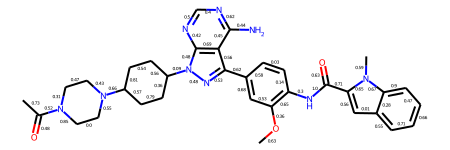

In [44]:
mol_2d

#### check rdkit_heatmap package
- use AllChem.EmbedMolecule(mol) to prevent the bad conformer id error

In [45]:
from rdkit.Chem import AllChem

In [46]:
from rdkit_heatmaps.molmapping import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

In [47]:
k = 'A-770041'
smiles = smiles_dict[k]
mol = Chem.MolFromSmiles(smiles)
AllChem.EmbedMolecule(mol)
# mol = Chem.AddHs(mol)

AllChem.Compute2DCoords(mol)
mol.GetConformer(0)

[19:27:47] Molecule does not have explicit Hs. Consider calling AddHs()


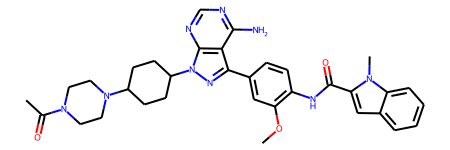

In [48]:
mol

In [49]:
bond_weights = []
for i, bond in enumerate(mol.GetBonds()):
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if u > v:
        u, v = v, u
    bond_weights.append(edge_ss_dict[(u, v)])
    bond.SetProp('bondNote',str(edge_ss_dict[(u, v)]))

# bond_weights

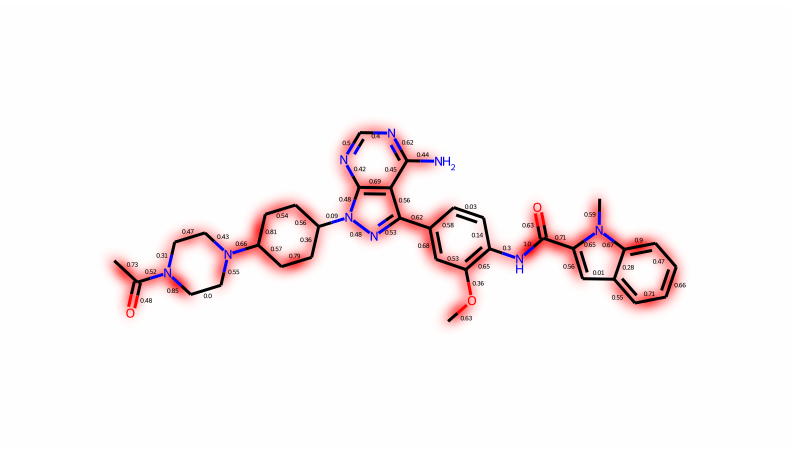

In [60]:
# mol = Chem.MolFromSmiles(smiles)
# AllChem.EmbedMolecule(mol)

canvas = mapvalues2mol(mol, bond_weights = bond_weights, bond_length=0.5, bond_width=0.3, value_lims=[-1, 1])
# canvas = mapvalues2mol(mol, bond_weights = bond_weights)

img = transform2png(canvas.GetDrawingText())
img

In [68]:
img.save('Amuvatinib_saliency_map.png')

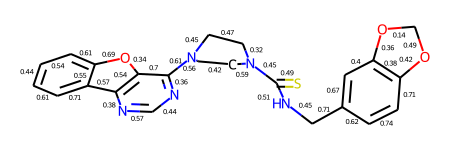

In [69]:
mol